# RoBERTa for Sentiment Analysis: A Powerful Tool

**RoBERTa, or a Robustly Optimized BERT Pretraining Approach, is a state-of-the-art language model that has proven to be highly effective in various natural language processing tasks, including sentiment analysis.**

### How RoBERTa Works for Sentiment Analysis:

- **Pre-training:** RoBERTa is initially trained on a massive amount of text data. This pre-training process helps the model learn the underlying linguistic patterns and nuances of language.
- **Fine-tuning:** Once pre-trained, the model is fine-tuned on a specific sentiment analysis dataset. This involves adjusting the model's parameters to better recognize sentiment expressed in text.
- **Sentiment Classification:** When presented with a new text, the fine-tuned RoBERTa model processes it and generates a sentiment score or classification. This score can indicate whether the sentiment is positive, negative, or neutral.

**Why RoBERTa Excels in Sentiment Analysis:**

- **Robustness:** RoBERTa's training process is designed to be more robust and less prone to overfitting, leading to better performance on diverse datasets.
- **Contextual Understanding:** It can capture the context of words within sentences, which is crucial for accurate sentiment analysis.
- **Handling Complex Sentiments:** RoBERTa can effectively handle complex sentiments, such as sarcasm, irony, and nuanced opinions.
- **State-of-the-Art Performance:** It has consistently achieved state-of-the-art results on various sentiment analysis benchmarks.
  
**Practical Applications:**

- **Social Media Monitoring:** Analyzing public sentiment towards brands, products, or current events.
- **Customer Feedback Analysis:** Understanding customer opinions and identifying areas for improvement.
- **Financial Sentiment Analysis:** Predicting market trends based on news articles and financial reports.
- **Review Analysis:** Assessing the overall sentiment of product reviews.
  
By leveraging the power of RoBERTa, businesses and researchers can gain valuable insights from textual data and make informed decisions.

# Load the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os

filename = "/content/data.csv"

df = pd.read_csv(filename,
                 encoding="utf-8", encoding_errors="replace")

df.columns = ["text", "sentiment"]
df.head(10)

,text,sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [2]:
def color_sentiment(val):
    """Colors the sentiment column based on the sentiment."""
    if val == 'positive':
        color = 'lightgreen'
    elif val == 'negative':
        color = 'lightcoral'
    else:  # neutral
        color = 'lightblue'
    return f'background-color: {color}'

# Style the DataFrame
styled_df = df.head(10).style.applymap(color_sentiment, subset=['sentiment'])

# Display the styled DataFrame
styled_df

,text,sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder Skepticism,negative
7,"SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .",negative
8,Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .,positive
9,"The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million .",neutral


In [3]:
import pandas as pd
import numpy as np

def clean_sentiment_data(df):
    """
    Perform basic cleaning on sentiment analysis dataset

    Parameters:
    df (pandas.DataFrame): Input DataFrame with 'text' and 'sentiment' columns

    Returns:
    pandas.DataFrame: Cleaned DataFrame
    """
    # Create a copy to avoid modifying original data
    cleaned_df = df.copy()

    # 1. Remove any duplicate rows
    cleaned_df = cleaned_df.drop_duplicates()

    # 2. Remove any rows with missing values
    cleaned_df = cleaned_df.dropna()

    # 3. Strip whitespace from text column
    cleaned_df['text'] = cleaned_df['text'].str.strip()

    # 4. Convert sentiment to lowercase for consistency
    cleaned_df['sentiment'] = cleaned_df['sentiment'].str.lower()

    # 5. Remove rows where text is empty after stripping
    cleaned_df = cleaned_df[cleaned_df['text'].str.len() > 0]

    # 6. Reset index after cleaning
    cleaned_df = cleaned_df.reset_index(drop=True)

    return cleaned_df

# Example usage:
cleaned_data = clean_sentiment_data(df)
display(cleaned_data.shape)
cleaned_data.head()

(5836, 2)

,text,sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


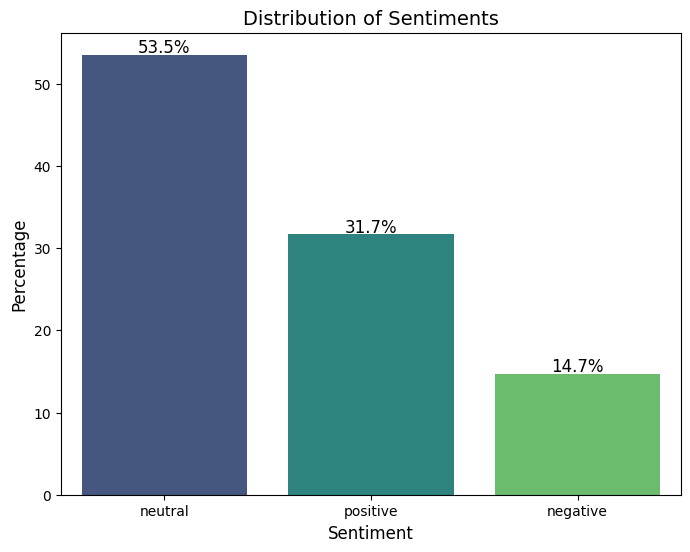

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of each sentiment
sentiment_counts = cleaned_data['sentiment'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Distribution of Sentiments", fontsize=14)
plt.show()


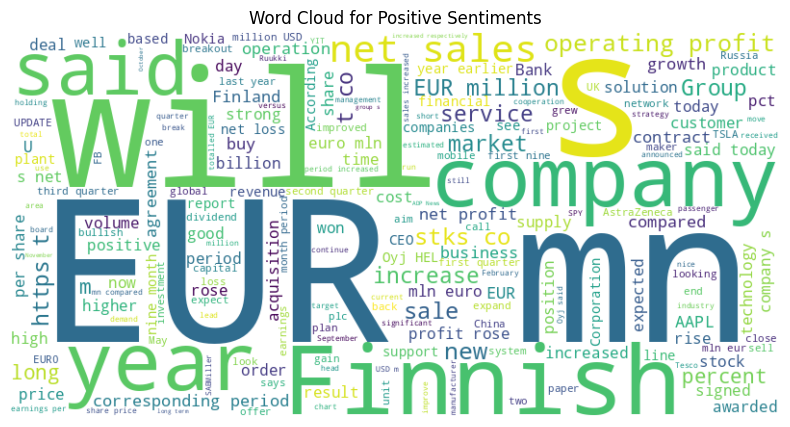

In [7]:
from wordcloud import WordCloud, STOPWORDS

# Filter for positive sentiments
positive_reviews = cleaned_data[cleaned_data['sentiment'] == 'positive']

# Combine all positive reviews into a single string
positive_text = " ".join(positive_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

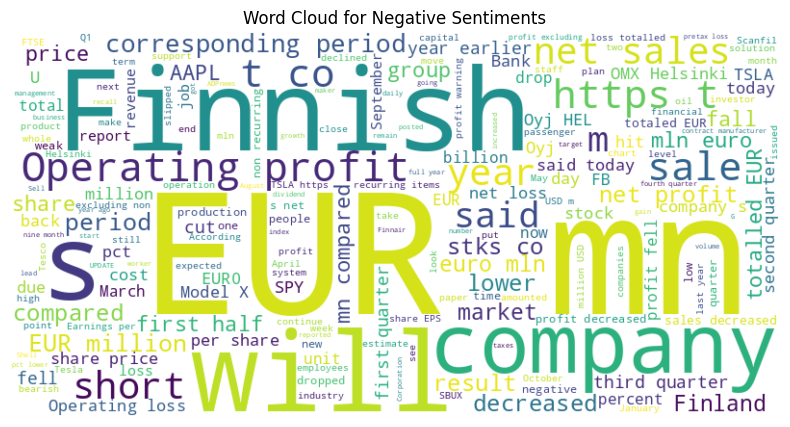

In [8]:
# Filter for negative sentiments
negative_reviews = cleaned_data[cleaned_data['sentiment'] == 'negative']

# Combine all negative reviews into a single string
negative_text = " ".join(negative_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

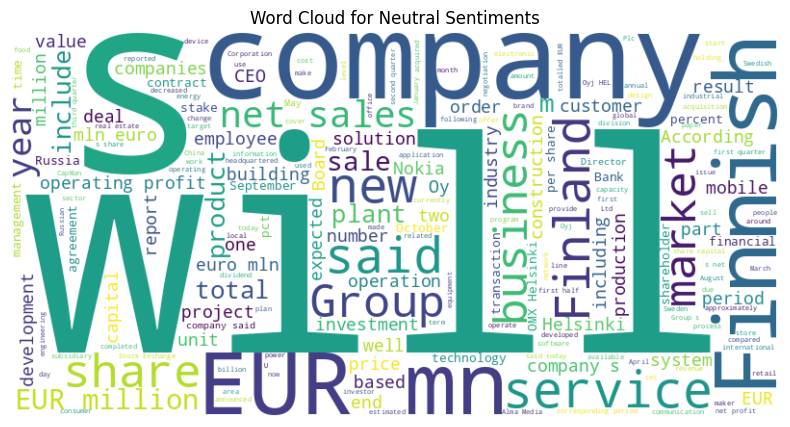

In [9]:
# Filter for neutral sentiments
neutral_reviews = cleaned_data[cleaned_data['sentiment'] == 'neutral']

# Combine all neutral reviews into a single string
neutral_text = " ".join(neutral_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Why Text is Lowercased in NLP

*Lowercasing text in NLP is a common preprocessing step that offers several key advantages:*

**Reduces Data Sparsity:**

1. NLP models often rely on word frequencies to learn patterns and relationships.
2. Having the same word in different cases (e.g., "Apple", "apple") can lead to multiple entries, reducing their overall frequency and potentially hindering the model's ability to learn effectively.
3. Lowercasing ensures that all occurrences of a word are treated as the same, increasing their frequency and improving model performance.

**Simplifies Analysis:**

1. Lowercasing simplifies text analysis by treating variations of the same word as identical.
2. This makes it easier to compare words, identify patterns, and perform tasks like stemming and lemmatization, which aim to reduce words to their root forms.

**Improves Model Performance:**

1. In many NLP tasks, such as text classification, sentiment analysis, and machine translation, lowercasing can significantly improve model accuracy.
2. By reducing the number of unique words and focusing on their semantic meaning, models can learn more robust representations and make better predictions.

**Use Cases and Advantages:**

1. Text Classification: Lowercasing helps models identify the same word regardless of its case, improving classification accuracy.
2. Sentiment Analysis: Lowercasing ensures that sentiment-bearing words are treated consistently, leading to more accurate sentiment predictions.
3. Machine Translation: Lowercasing simplifies the translation process by reducing the number of word variations that need to be considered.
4. Information Retrieval: Lowercasing improves search accuracy by ensuring that queries and documents are compared consistently.
5. Natural Language Understanding: Lowercasing aids in understanding the underlying meaning of text by focusing on the semantic content rather than superficial case variations.

In [11]:
def convert_to_lowercase(df):
    """Step 1: Convert text to lowercase"""
    df['text_lower'] = df['text'].str.lower()
    return df

df = convert_to_lowercase(cleaned_data)
df.head()

,text,sentiment,text_lower
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [14]:
def remove_special_characters(df):
    """Step 2: Remove special characters and numbers"""
    df['text_clean'] = df['text_lower'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    return df

df = remove_special_characters(df)
df.head()

,text,sentiment,text_lower,text_clean
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [15]:
dfx1 = df[['text','sentiment','text_clean']]
dfx1.head()

,text,sentiment,text_clean
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [17]:
def remove_urls(df):
    """Step 3: Remove URLs"""
    df['text_no_urls'] = df['text_clean'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
    return df

df = remove_urls(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [18]:
dfx2 = df[['text','sentiment','text_no_urls']]
dfx2.head()

,text,sentiment,text_no_urls
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [19]:
def remove_extra_whitespace(df):
    """Step 4: Remove extra whitespace"""
    df['text_stripped'] = df['text_no_urls'].apply(lambda x: ' '.join(x.split()))
    return df

df = remove_extra_whitespace(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [20]:
dfx3 = df[['text','sentiment','text_stripped']]
dfx3.head()

,text,sentiment,text_stripped
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sales...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [21]:
import nltk
nltk.download('punkt_tab')
import nltk

nltk.download('wordnet')

def tokenize_text(df):
    """Step 5: Tokenization"""
    df['tokens'] = df['text_stripped'].apply(word_tokenize)
    return df

df = tokenize_text(df)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."


In [23]:
dfx4 = df[['text','sentiment','tokens']]
dfx4.head()

,text,sentiment,tokens
0,The GeoSolutions technology will leverage Bene...,positive,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, on, lows, down, to, bk, a, real, possibi..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[for, the, last, quarter, of, componenta, s, n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[the, swedish, buyout, firm, has, sold, its, r..."


In [27]:
import nltk
from nltk.corpus import wordnet
import os

def lemmatize_text(df):
    """Step 7: Lemmatization (after ensuring WordNet corpus is downloaded)"""
    wordnet_path = os.path.join('corpora', 'wordnet')  # Create the relative path to 'wordnet'
    if not any(os.path.exists(os.path.join(path, wordnet_path)) for path in nltk.data.path):
        print("WordNet corpus not found. Downloading...")
        nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df

df = lemmatize_text(df)
df.head()

WordNet corpus not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce..."


In [28]:
dfx5 = df[['text','sentiment','lemmatized']]
dfx5.head()

,text,sentiment,lemmatized
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sale, doubled..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, perce..."


In [41]:
 def join_tokens(df):
     """Step 8: Join tokens back to text"""
     df['processed_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
     return df


 df = join_tokens(df)
 df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,sentiment_encoded,processed_text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",2,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",0,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",2,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",1,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",1,swedish buyout firm sold remaining percent sta...


In [42]:
dfx6 = df[['text','sentiment','processed_text']]
dfx6.head()

,text,sentiment,processed_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...


In [29]:
def remove_stopwords(df):
    """Step 6: Remove stopwords"""
    stop_words = set(stopwords.words('english'))
    df['tokens_no_stop'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

df = remove_stopwords(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce..."


In [43]:
dfx7 = df[['text','sentiment','tokens_no_stop']]
dfx7.head()

,text,sentiment,tokens_no_stop
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, lows, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sales, double..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, perce..."


In [31]:
def encode_labels(df):
    """Step 9: Encode sentiment labels"""
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
    return df, le

df, label_encoder = encode_labels(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,sentiment_encoded
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",0
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",2
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",1
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",1


In [37]:
dfx8 = df[['text','sentiment','sentiment_encoded']]
dfx8.head()

,text,sentiment,sentiment_encoded
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,1
4,The Swedish buyout firm has sold its remaining...,neutral,1


In [45]:
def create_tfidf(df, max_features=5000):
    """Step 10: TF-IDF Vectorization"""
    tfidf = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = tfidf.fit_transform(df['processed_text'])
    return tfidf_matrix, tfidf

tfidf_matrix, tfidf_vectorizer = create_tfidf(df)

df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,sentiment_encoded,processed_text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",2,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",0,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",2,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",1,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",1,swedish buyout firm sold remaining percent sta...


In [ ]:
%%time

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

def create_balanced_dataset(df, n_samples=5000):
    """
    Create a balanced dataset with specified number of samples
    """
    # Convert sentiment to numeric
    sentiment_map = {
        'negative': 0,
        'neutral': 1,
        'positive': 2
    }
    df['label'] = df['sentiment'].map(sentiment_map)

    # Calculate samples per class
    samples_per_class = n_samples // 3

    # Get balanced data for each class
    balanced_dfs = []
    for label in range(3):
        class_df = df[df['label'] == label]
        if len(class_df) > samples_per_class:
            balanced_dfs.append(class_df.sample(n=samples_per_class, random_state=42))
        else:
            # If we don't have enough samples, oversample
            balanced_dfs.append(class_df.sample(n=samples_per_class, replace=True, random_state=42))

    # Combine balanced datasets
    balanced_df = pd.concat(balanced_dfs)

    # Shuffle the final dataset
    return balanced_df.sample(frac=1, random_state=42)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def train_sentiment_model(df, test_size=0.2, num_epochs=3, batch_size=16, learning_rate=2e-5):
    # Create balanced dataset
    print("Creating balanced dataset...")
    balanced_df = create_balanced_dataset(df, n_samples=5000)
    print(f"Class distribution:\n{balanced_df['label'].value_counts()}")

    # Split the data
    train_df, test_df = train_test_split(balanced_df, test_size=test_size, random_state=42, stratify=balanced_df['label'])

    # Get texts and labels
    train_texts = train_df['text'].tolist()
    train_labels = train_df['label'].tolist()
    test_texts = test_df['text'].tolist()
    test_labels = test_df['label'].tolist()

    # Initialize tokenizer
    print("Initializing RoBERTa tokenizer...")
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

    # Create datasets
    train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
    test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    print("Initializing RoBERTa model...")
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Set up optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    # Training loop
    print(f"Training on {device}")
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        print(f"\nEpoch {epoch + 1}/{num_epochs}")

        # Training
        for batch_idx, batch in enumerate(train_loader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 10 == 0:
                print(f"Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        # Evaluation
        model.eval()
        test_preds = []
        test_true = []

        print("\nEvaluating...")
        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels']

                outputs = model(input_ids, attention_mask=attention_mask)
                preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

                test_preds.extend(preds)
                test_true.extend(labels.numpy())

        # Calculate metrics
        accuracy = accuracy_score(test_true, test_preds)
        print(f'Average training loss: {total_loss/len(train_loader):.4f}')
        print(f'Test Accuracy: {accuracy:.4f}')

        # Detailed classification report
        print('\nClassification Report:')
        print(classification_report(test_true, test_preds,
                                 target_names=['Negative', 'Neutral', 'Positive']))

    # Save the model
    print("\nSaving model...")
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'tokenizer': tokenizer
    }, 'roberta_sentiment_model_balanced.pth')

    return model, tokenizer

def predict_sentiment(text, model, tokenizer, device):
    model.eval()
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
        # Get confidence scores
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy()[0]

    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_map[pred], probs[pred]

# Main execution
if __name__ == "__main__":
    # Assuming df is your input dataframe
    print("Starting training process...")
    model, tokenizer = train_sentiment_model(df)

    # Example prediction
    example_text = "The geosolutions technology will leverage benefon gps solutions"
    sentiment, confidence = predict_sentiment(example_text, model, tokenizer,
                                           torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    print(f"\nExample prediction for: '{example_text}'")
    print(f"Predicted sentiment: {sentiment} (confidence: {confidence:.2f})")

Starting training process...
Creating balanced dataset...
Class distribution:
label
0    1666
1    1666
2    1666
Name: count, dtype: int64
Initializing RoBERTa tokenizer...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Initializing RoBERTa model...


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training on cuda

Epoch 1/3
Batch 10/250, Loss: 1.1054
Batch 20/250, Loss: 1.1051
Batch 30/250, Loss: 1.1133
Batch 40/250, Loss: 1.1100
Batch 50/250, Loss: 1.2173
Batch 60/250, Loss: 0.9724
Batch 70/250, Loss: 0.5154
Batch 80/250, Loss: 0.8360
Batch 90/250, Loss: 0.5330
Batch 100/250, Loss: 0.6709
Batch 110/250, Loss: 0.8217
Batch 120/250, Loss: 0.4246
Batch 130/250, Loss: 0.2967
Batch 140/250, Loss: 0.5102
Batch 150/250, Loss: 0.4826
Batch 160/250, Loss: 0.6427
Batch 170/250, Loss: 0.5883
Batch 180/250, Loss: 0.4288
Batch 190/250, Loss: 0.1409
Batch 200/250, Loss: 0.7395
Batch 210/250, Loss: 0.6039
Batch 220/250, Loss: 0.5163
Batch 230/250, Loss: 0.2302
Batch 240/250, Loss: 0.3323
Batch 250/250, Loss: 0.4995

Evaluating...
Average training loss: 0.6564
Test Accuracy: 0.8400

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.95      0.85       333
     Neutral       0.88      0.70      0.78       333
    Positive       0.90    